In [1]:
import pandas as pd
import yfinance as yf
from pathlib import Path
import plotly.graph_objects as go
import plotly.express as px

# Getting timespan to explore

In [2]:
videos_df = pd.read_csv("outputs/videoInfo.csv", usecols = ["publishedAt"])

min_date, max_date = videos_df.publishedAt.min()[:10], videos_df.publishedAt.max()[:10]
min_date, max_date

('2017-01-26', '2022-07-27')

# Download SPY Data

In [3]:
ticket_name = "SPY"

ticket = yf.Ticker(ticket_name)

data = yf.download(ticket_name, start = min_date, end = max_date).reset_index()
data.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-26,229.399994,229.710007,229.009995,229.330002,208.340851,59970700
1,2017-01-27,229.419998,229.589996,228.759995,228.970001,208.013763,59711100
2,2017-01-30,228.169998,228.199997,226.410004,227.550003,206.723740,79737300
3,2017-01-31,226.979996,227.600006,226.320007,227.529999,206.705597,75880800
4,2017-02-01,227.529999,228.589996,226.940002,227.619995,206.787338,79117700


In [4]:
cwd = Path().absolute()
output_dir = f"{cwd}/outputs"
Path(output_dir).mkdir(parents = True, exist_ok = True)


data.to_csv(f"{output_dir}/SPY.csv", index = False)

# Plot Prices

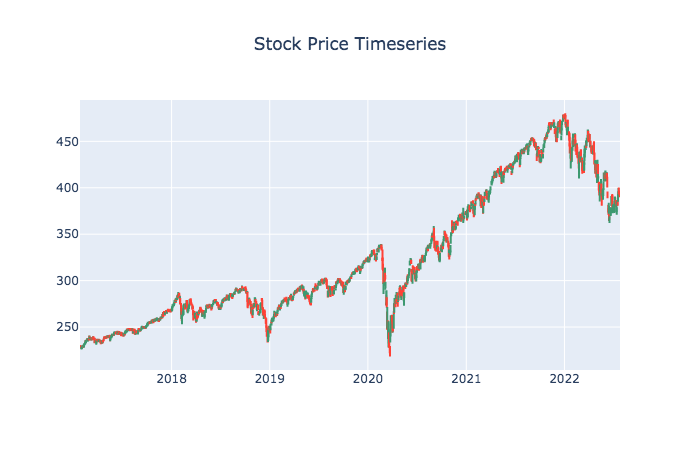

In [5]:
fig = go.Figure(data=[go.Candlestick(
                    x = data["Date"],
                    open = data["Open"],
                    high = data["High"],
                    low = data["Low"],
                    close = data["Close"])
                    ])

fig.update_layout(xaxis_rangeslider_visible=False, title="Stock Price Timeseries", title_x=0.5)
fig.show("png")

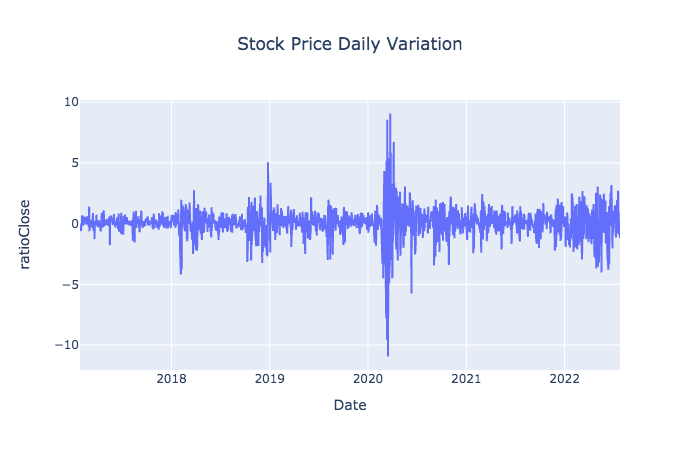

In [6]:
data["lastClose"] = data["Close"].shift()
data["ratioClose"] = 100 * (data["Close"] / data["lastClose"] - 1)

fig = px.line(data, x = "Date", y = "ratioClose", title = "Stock Price Daily Variation")
fig.update_layout(title_x=0.5)
fig.show("png")